# Analysis of PetMind's Sales Performance

- PetMind is a retailer of products for pets. They are based in the United States.
- PetMind sells products that are a mix of luxury items and everyday items. Luxury items include toys. Everyday items include food.
- The company wants to increase sales by selling more everyday products repeatedly.
- They have been testing this approach for the last year.
- They now want a report on how repeat purchases impact sales.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pet_supplies_2212.csv')
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [3]:
# Return a tuple representing the dimensionality of the DataFrame

df.shape

(1500, 8)

In [4]:
# Return an int representing the number of elements

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [5]:
df.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [6]:
df.dtypes

product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object


### - There are 150 missing values in the rating column i.e. 10 % . All the other columns have 0 missing values  

### - Category column contained 7 unique values , including  '-' and it dosen't contain any missing values. ('-') is replaced with   	“Unknown”.
### - There are values with inconsistent capitalization.have replaced values to correct the error.
### - The column Price has a value unlisted,which has been replaced with median value of the column.

In [7]:
# To detect missing values

df.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [8]:
# Display the percentage of missing values

df.isna().sum(axis = 0) / len(df) * 100

product_id          0.0
category            0.0
animal              0.0
size                0.0
price               0.0
sales               0.0
rating             10.0
repeat_purchase     0.0
dtype: float64

In [9]:
# Count number of distinct elements 

df.nunique()

product_id         1500
category              7
animal                4
size                  9
price               707
sales              1476
rating                9
repeat_purchase       2
dtype: int64

In [10]:
# Missing values are not present in the column product_id as there are 1500 distinct elements

In [11]:
# Count number of distinct elements 

df['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       '-'], dtype=object)

In [12]:
# To Replace Missing values ('-') should be replaced with “Unknown”

In [13]:
df['category'] = df['category'].replace('-', 'Unknown')
df['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       'Unknown'], dtype=object)

### Category column contained 7 unique values , including  '-' and it dosen't contain any missing values. ('-') is replaced with “Unknown”.

In [14]:
# Count number of distinct elements 

df['animal'].unique()

array(['Bird', 'Dog', 'Cat', 'Fish'], dtype=object)

In [15]:
df['animal'].isnull().sum()

0

In [16]:
# No missing values are present in the column animal

In [17]:
# Count number of distinct elements 

df['size'].unique()

array(['large', 'MEDIUM', 'medium', 'small', 'Small', 'Large', 'SMALL',
       'Medium', 'LARGE'], dtype=object)

In [18]:
df['size'].isnull().sum()

0

In [19]:
df['size'] = df['size'].replace(['SMALL', 'small'], 'Small')
df['size'] = df['size'].replace(['MEDIUM', 'medium'], 'Medium')
df['size'] = df['size'].replace(['LARGE','large'], 'Large')

df['size'].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

### There are more than 3 unique values.Now we have replaced remaining values to correct the error

In [20]:
# category,animal & size columns can be converted to Category data type.This will help us in Memory efficiency,Speed & Validity.

In [21]:
# category,animal columns are Nominal whereas size is Ordinal.The pandas Category data type can be used to represent both ordinal and nominal data.


df['category'] = df['category'].astype('category')
df['animal'] = df['animal'].astype('category')

In [22]:
df['size'] = df['size'].astype('category')
df['size'].cat.set_categories(['Small', 'Medium', 'Large'], inplace=True)

In [23]:
df['price'].head(21)

0         51.1
1        35.98
2        31.23
3        24.95
4        26.18
5        30.77
6        31.04
7         28.9
8        17.82
9        24.93
10       40.87
11       34.96
12       31.07
13        40.8
14       33.13
15       43.09
16       28.29
17       43.91
18       33.87
19          44
20    unlisted
Name: price, dtype: object

In [24]:
df['price'] = df['price'].replace('unlisted', None)

In [25]:
# Calculate the overall median of the 'Price' column
median = df['price'].median()
median


28.064999999999998

In [26]:
# Replace None values with the overall median
df['price'] = df['price'].fillna(median)

In [27]:
df['price'].dtype

dtype('O')

In [28]:
df['price'] = df['price'].astype('float')


In [29]:
df['price'].dtype

dtype('float64')

### The column Price has a value unlisted,which has been replaced with median value of the column

In [30]:
df['sales'].head()

0    1860.62
1     963.60
2     898.30
3     982.15
4     832.63
Name: sales, dtype: float64

In [31]:
df['sales'].dtype

dtype('float64')

In [32]:
df['rating'].head()

0    7.0
1    6.0
2    5.0
3    6.0
4    7.0
Name: rating, dtype: float64

In [33]:
df['rating'].unique()

array([ 7.,  6.,  5.,  4.,  8.,  1.,  3., nan,  2.,  9.])

In [34]:
df['rating'].isnull().sum()

150

In [35]:
# to replace missing values with 0
df['rating'].fillna(0, inplace=True)

In [36]:
df['rating'].unique()

array([7., 6., 5., 4., 8., 1., 3., 0., 2., 9.])

In [37]:
df['rating'].isnull().sum()

0

In [38]:
df['repeat_purchase'].head()

0    1
1    0
2    1
3    1
4    1
Name: repeat_purchase, dtype: int64

In [39]:
df['repeat_purchase'].unique()

array([1, 0])

### Total number of products with repeat purchases is 906
### Category Equipment has most observations i.e 221
### The data is imbalanced as some categories have significantly more or fewer observations than others.

In [40]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


### To find how many products are repeat purchases. 

In [41]:
# To calculate total number of repeat purchases

num_repeat_purchases = df['repeat_purchase'].sum()

print(num_repeat_purchases)

906


In [42]:
# Group the data by product_id and sum the repeat_purchases column
repeat_purchases_per_category = df.groupby('category')['repeat_purchase'].sum()

repeat_purchases_per_category

category
Accessory     70
Equipment    221
Food         151
Housing      152
Medicine     153
Toys         145
Unknown       14
Name: repeat_purchase, dtype: int64

In [43]:
repeat_purchases_per_category_sorted = repeat_purchases_per_category.sort_values(ascending=False)

print(repeat_purchases_per_category_sorted)

category
Equipment    221
Medicine     153
Housing      152
Food         151
Toys         145
Accessory     70
Unknown       14
Name: repeat_purchase, dtype: int64


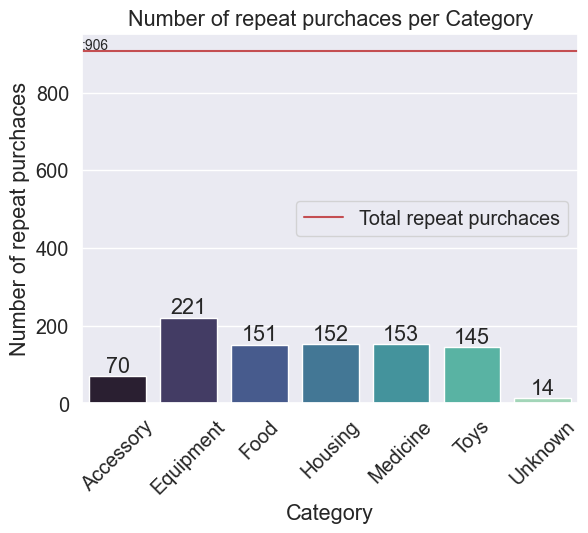

In [44]:
# Create a count plot of the categories

sns.set(font_scale=1.3)
sns.set_style("darkgrid")

# Calculate the total sum of values across all columns
total_sum = repeat_purchases_per_category.sum()

ax = sns.barplot(x=repeat_purchases_per_category.index, y=repeat_purchases_per_category.values,palette="mako")

plt.xlabel('Category')
plt.ylabel('Number of repeat purchaces')
plt.title('Number of repeat purchaces per Category')
plt.xticks(rotation=45)
plt.axhline(y=total_sum, color='r', linestyle='-',label='Total repeat purchaces')
# Adding the total sum value on the visualization
plt.text(x=-0.5, y=total_sum+5, s=f':{total_sum}', fontsize=10)
plt.legend()

for i in ax.containers:
    ax.bar_label(i,)


### The distribution of the sales column in the dataset can be described as follows: 
### The central tendency measures of the dataset show that the mean of the sales column is 996.59, and the median of the sales column is 1000.82 . The mode is  1034.36, which indicates that this value is the most frequent among the sales values.
### The spread measures of the dataset indicate that the range of the sales column is 1969.02, with a variance of 104945.33 and a standard deviation of 323.95.

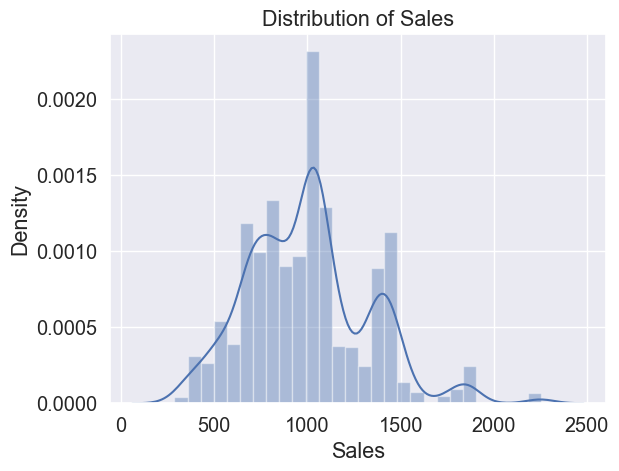

In [45]:
sns.distplot(df['sales'],kde = True)
plt.xlabel('Sales')
plt.title('Distribution of Sales')
plt.show()

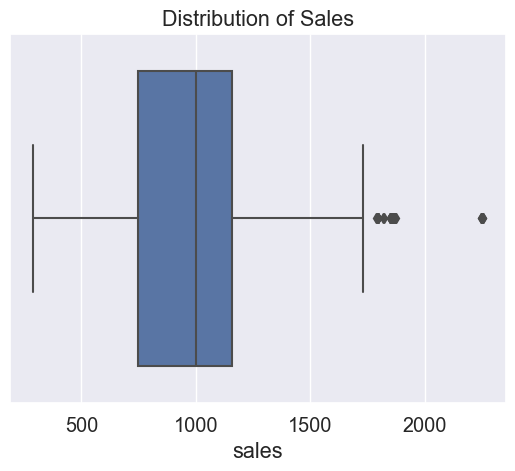

In [46]:
sns.boxplot(data=df, x='sales')
plt.title('Distribution of Sales')
plt.show()

In [47]:
# Calculate the quartiles
Q1 = df.sales.quantile(0.25)
Q3 = df.sales.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers as any data points that are more than 1.5 times the IQR below the first quartile or above the third quartile
outliers = df.sales[(df.sales < (Q1 - 1.5 * IQR)) | (df.sales > (Q3 + 1.5 * IQR))]
print("Outliers: ", outliers)

Outliers:  0       1860.62
19      1792.63
39      2248.63
73      1864.01
150     1859.84
164     1869.97
173     1868.47
178     1855.16
212     1816.23
227     1846.82
249     1795.05
279     1795.77
291     1861.97
292     1864.04
294     2249.40
328     1859.03
404     1849.66
421     1854.43
448     2248.04
458     1871.35
466     2246.77
469     1861.15
517     1797.02
531     1862.12
548     1820.00
579     1790.98
587     1855.21
605     1861.87
622     1852.79
648     1853.37
652     2254.99
727     1793.71
945     1788.28
969     1854.64
982     1848.03
1097    1863.64
1104    2244.67
1155    1866.60
1198    1864.23
1277    1795.37
1416    1873.47
1440    1853.36
1442    2255.96
Name: sales, dtype: float64


In [48]:
mean_ = df.sales.mean()
mean_

996.5978466666667

In [49]:
median_ = df.sales.median()
median_

1000.8299999999999

In [50]:
mode_ = df.sales.mode()
mode_

0    1034.36
Name: sales, dtype: float64

In [51]:
std_ = df.sales.std()
std_

323.9526760344836

In [52]:
var_ = df.sales.var()
var_

104945.3363099031

In [53]:
range_ = df.sales.max() - df.sales.min()
range_

1969.02

### The median value of sales is lower for products with repeat purchases, it means that the typical (or median) sale value of those products is lower compared to products that are not purchased repeatedly but the total value of sales for products with repeat purchases is greater due to the presence of outliers.

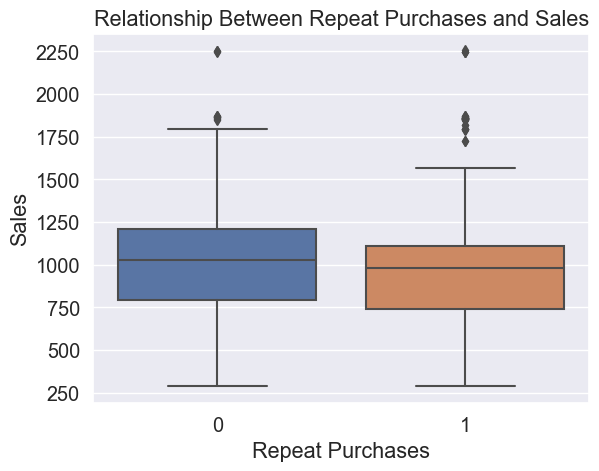

In [54]:
sns.boxplot(x='repeat_purchase', y='sales', data=df)
plt.xlabel('Repeat Purchases')
plt.ylabel('Sales')
plt.title('Relationship Between Repeat Purchases and Sales')
plt.show()

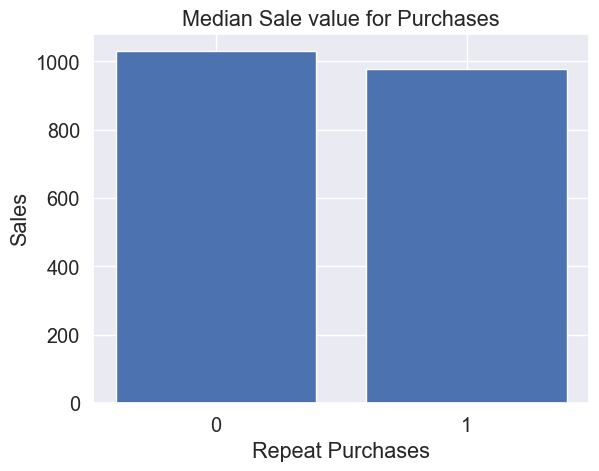

In [55]:
# Group the data by repeat purchases and get median of the sales
# It is best to use the median as there are outliers present

sales_by_repeat_purchases = df.groupby('repeat_purchase')['sales'].median()

# Get the categories and the sales values
categories = list(sales_by_repeat_purchases.index)
sales_values = list(sales_by_repeat_purchases.values)

# Set the x-axis tick labels
plt.xticks(range(len(categories)), categories)

# Create the plot
plt.bar(range(len(categories)), sales_values, align='center')

plt.xlabel('Repeat Purchases')
plt.ylabel('Sales')
plt.title('Median Sale value for Purchases')


# Show the plot
plt.show()

In [56]:
repeat_sales_per_category = df.groupby('repeat_purchase')['sales'].sum()

repeat_sales_per_category

repeat_purchase
0    610850.60
1    884046.17
Name: sales, dtype: float64